#**Project: Carbon Emissions from Five Countries with the Largest Forest from 1990 to 2019**
Carbon emission from the top 5 nations with the largest forest in 1990-2019. The data source is Kaggle, which contains global greenhouse gas emissions from agricultural and forest land from 1961 to 2019.

Wilhelmus Medhavi - Fairuz Nur Indah Putri

Dataset Link : https://www.kaggle.com/ankitpranay/global-emissions-from-agriculture-and-forest-land


## **Data Exploratory and Cleansing**

In [ ]:
# Install the package (skip if it’s not necessary)
!pip install geopandas
!pip install pycountry

     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
     |████████████████████████████████| 16.7 MB 48.0 MB/s 
     |████████████████████████████████| 10.1 MB 13.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=462f7c3b699b9cee373210639aec869829a3d50389cd606975c66a958ae06a31
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Import all modules needed
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas
import matplotlib.colors
import pycountry 

In [ ]:
# Load the dataset
fao = pd.read_csv('FAOSTAT_data_1961_2019.csv')
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33434 entries, 0 to 33433
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     33434 non-null  int64  
 1   Area          33434 non-null  object 
 2   Item Code     33434 non-null  int64  
 3   Item          33434 non-null  object 
 4   Element Code  33434 non-null  int64  
 5   Element       33434 non-null  object 
 6   Source Code   33434 non-null  int64  
 7   Source        33434 non-null  object 
 8   Unit          33434 non-null  object 
 9   Y1961         9695 non-null   float64
 10  Y1962         9695 non-null   float64
 11  Y1963         9695 non-null   float64
 12  Y1964         9705 non-null   float64
 13  Y1965         9705 non-null   float64
 14  Y1966         9720 non-null   float64
 15  Y1967         9728 non-null   float64
 16  Y1968         9754 non-null   float64
 17  Y1969         9764 non-null   float64
 18  Y1970         9772 non-nul

In [ ]:
# Show the dataset table
fao.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,Y1961,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3050,FAO TIER 1,kilotonnes,240.6831,...,401.068,402.513,396.921,393.093,398.287,383.3023,380.8767,371.2863,378.887,389.6563
1,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3051,UNFCCC,kilotonnes,NaN,...,NaN,NaN,NaN,414.000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("There are", fao.shape[1], "columns and", fao.shape[0], "in dataset")

There are 68 columns and 33434 in dataset


In [ ]:
# Collumns description
# Area Code = (281 unique value) countries unique code
# Area      = (281 unique value) countries
# Item Code  = (24) the emissions causes unique code
# Item       = (24) the emissions causes
# Element Code  = (8) pollutants unique code
# Element       = (8) pollutants 
# Source Code   = (2) 
# Source        = (2) 
# Units = kilotones

In [ ]:
# Checking the null values 
pd.options.display.max_rows = None
print("There are {} null values in the dataset".format(fao.isna().any().sum()))
print("There are {} duplicate rows".format(fao.duplicated().any().sum()))

There are 59 null values in the dataset
There are 0 duplicate rows


In [ ]:
# Fill in the rows with empty values (NaN) using the function

def fillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(0)
    elif series.dtype is pd.np.dtype(object):
        return series.fillna('-')
    else:
        return series

fao = fao.apply(fillna)

# Rename the year column to a number and change the whitespace to an underscore
fao.columns = fao.columns.str.replace(' ','_')
fao.columns = fao.columns.str.replace('Y','')
fao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Area_Code,Area,Item_Code,Item,Element_Code,Element,Source_Code,Source,Unit,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3050,FAO TIER 1,kilotonnes,240.6831,...,401.068,402.513,396.921,393.093,398.287,383.3023,380.8767,371.2863,378.8870,389.6563
1,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3051,UNFCCC,kilotonnes,0.0000,...,0.000,0.000,0.000,414.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3050,FAO TIER 1,kilotonnes,6739.1279,...,11229.904,11270.364,11113.788,11006.604,11152.036,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754
3,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3051,UNFCCC,kilotonnes,0.0000,...,0.000,0.000,0.000,11592.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,6739.1279,...,11229.904,11270.364,11113.788,11006.604,11152.036,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754


In [ ]:
# Checks any causative activity that causes emissions in the item column
fao.groupby('Item').agg({'Item' : 'nunique'})

,Item
Item,
AFOLU,1
Agricultural Soils,1
Burning - Crop residues,1
Crop Residues,1
Drained organic soils,1
Drained organic soils (CO2),1
Drained organic soils (N2O),1
Emissions on agricultural land,1
Enteric Fermentation,1


In [ ]:
# Check what kind of pollutant causes emission in the element column
fao.groupby('Element').agg({'Element' : 'nunique'})

,Element
Element,
Direct emissions (N2O),1
Emissions (CH4),1
Emissions (CO2),1
Emissions (CO2eq) (AR5),1
Emissions (CO2eq) from CH4 (AR5),1
Emissions (CO2eq) from N2O (AR5),1
Emissions (N2O),1
Indirect emissions (N2O),1


To simplify the analysis, five countries with the largest forest area in the world will be selected (considering the critical role of forests as carbon sinks), and the period used is 1990-2019 (industrial and technological developments are increasingly rapid, especially in the 21st century).

https://ourworldindata.org/global-deforestation-peak


In [ ]:
# Filter the selected countries 
df_selected_area = fao[fao['Area'].isin(['Brazil', 'Canada', 'Indonesia', 'Congo', 'India'])]
df_selected_area['Area'].unique()

array(['Brazil', 'Canada', 'Congo', 'India', 'Indonesia'], dtype=object)

In [ ]:
# Create a new dataset containing the selected country and desired time range
df_selected = df_selected_area.loc[:, ['Area', 'Area_Code', 'Item_Code', 'Item', 'Element_Code', 'Element', 'Source_Code', 
                                       'Source', 'Unit','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', 
                                       '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', 
                                       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', 
                                       '2018', '2019']]

In [ ]:
# View descriptive statistics from the dataset
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Area_Code,707.0,59.821782,33.867421,21.0000,33.00000,46.0000,100.00000,101.000
Item_Code,707.0,10053.036775,17086.278821,1707.0000,5059.00000,5066.0000,6993.00000,69921.000
Element_Code,707.0,371094.359264,358493.839624,7225.0000,7230.00000,723113.0000,724313.00000,724413.000
Source_Code,707.0,3050.205092,0.404055,3050.0000,3050.00000,3050.0000,3050.00000,3051.000
1990,707.0,44155.839604,189441.774584,-487800.4147,5.10080,234.5274,7066.91740,1770950.539
1991,707.0,44624.829112,190491.506118,-487800.4147,5.36410,222.1431,6915.23480,1782941.900
1992,707.0,44925.377567,191024.593530,-487800.4147,5.36190,222.1431,7270.31400,1788737.330
1993,707.0,44654.960872,191401.757449,-487800.4147,5.36715,222.1431,7540.54270,1790803.920
1994,707.0,46477.132752,194088.406200,-487800.4147,13.38265,362.4839,9859.40835,1799166.887
1995,707.0,45046.614116,191426.760596,-487800.4147,4.93000,213.9865,6645.42295,1806787.924


In [ ]:
# Creating a dataset for each country
df_Brazil = df_selected[df_selected['Area'] == 'Brazil']
df_Canada = df_selected[df_selected['Area'] == 'Canada']
df_Congo = df_selected[df_selected['Area'] == 'Congo']
df_Indonesia = df_selected[df_selected['Area'] == 'Indonesia']
df_India = df_selected[df_selected['Area'] == 'India']

# **Data Preparation**

**1. Brazil**

In [ ]:
# Create a new table containing the amount of carbon emissions per type each year from Brazil
brazil_carbon = df_Brazil.groupby('Element').agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum',})
df_carbon_brazil = pd.DataFrame(data=brazil_carbon.T).reset_index().rename(columns={'index':'year'})
df_carbon_brazil.head()

Element,year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,1990,1419.9061,67549.3806,4.549661e+06,7.138107e+06,1.891383e+06,696781.0260,2629.3624,352.3007
1,1991,1465.0290,69724.5886,4.550311e+06,7.219465e+06,1.952288e+06,716583.1931,2704.0874,363.5478
2,1992,1494.0119,70861.8236,4.548694e+06,7.264206e+06,1.984131e+06,731098.3310,2758.8616,370.5977
3,1993,1520.8686,70947.8860,4.549904e+06,7.278674e+06,1.986541e+06,741947.1433,2799.8006,377.5926
4,1994,1568.7583,72294.8687,4.195094e+06,6.984295e+06,2.024256e+06,764662.2436,2885.5181,389.9814


In [ ]:
# Create a new table containing the causes of carbon emissions from Brazil

filter_brazil = df_Brazil[(df_Brazil["Element"] == "Emissions (CO2eq) (AR5)") & (df_Brazil["Item"].isin(["Drained organic soils", "Fires in humid tropical forests", "Fires in organic soils", "Forestland", "LULUCF", "Savanna fires"]))]
group1 = filter_brazil.groupby(['Item']).agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum'})

group1.reset_index().set_index('Item',inplace=True)
transpose_brazil = group1.T
transpose_brazil.reset_index(inplace=True)
transpose_brazil.rename(columns= {'index':'year'}, inplace= True)
transpose_brazil.rename_axis('index')
transpose_brazil['year']= transpose_brazil['year'].astype(int)
transpose_brazil.head()

Item,year,Drained organic soils,Fires in humid tropical forests,Fires in organic soils,Forestland,LULUCF,Savanna fires
0,1990,282.3285,9799.9872,1841.5288,-346950.8412,1050372.863,11141.8799
1,1991,282.3285,9799.9872,1841.5288,-346950.8412,1050372.863,11141.8799
2,1992,282.3285,9799.9872,1841.5288,-346950.8412,1050372.863,11141.8799
3,1993,282.3285,9799.9872,1841.5288,-346950.8412,1050372.863,11141.8799
4,1994,282.3285,9799.9872,1841.5288,-701969.8412,1050372.863,11141.8799


**2. Canada**

In [ ]:
# Create a new table containing the amount of carbon emissions per type each year from Canada
canada_carbon = df_Canada.groupby('Element').agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum',})
df_carbon_canada = pd.DataFrame(data=canada_carbon.T).reset_index().rename(columns={'index':'year'})
df_carbon_canada.head()

Element,year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,1990,362.2789,7942.3654,311659.8772,735640.7065,222386.2290,178450.4320,673.3981,84.3418
1,1991,365.5737,7963.2170,306413.8966,731953.8171,222970.0751,179425.6773,677.0781,86.5856
2,1992,372.8345,8204.1236,306283.0919,741936.8221,229715.4644,182794.0974,689.7891,88.8660
3,1993,386.8307,8207.6154,309133.0015,750308.3967,229813.2255,188218.0017,710.2566,92.2673
4,1994,390.5629,8320.9262,309745.5742,756395.7932,232985.9337,190521.6468,718.9495,93.4094


In [ ]:
# Create a new table containing the causes of carbon emissions from Canada

filter_canada = df_Canada[(df_Canada["Element"] == "Emissions (CO2eq) (AR5)") & (df_Canada["Item"].isin(["Drained organic soils", "Fires in humid tropical forests", "Fires in organic soils", "Forestland", "LULUCF", "Savanna fires"]))]
group2 = filter_canada.groupby(['Item']).agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum'})

group2.reset_index().set_index('Item',inplace=True)
transpose_canada = group2.T
transpose_canada.reset_index(inplace=True)
transpose_canada.rename(columns= {'index':'year'}, inplace= True)
transpose_canada.rename_axis('index')
transpose_canada['year']= transpose_canada['year'].astype(int)
transpose_canada.head()

Item,year,Drained organic soils,Fires in humid tropical forests,Fires in organic soils,Forestland,LULUCF,Savanna fires
0,1990,23144.1682,0.0,40146.2818,-274763.9493,106701.8618,838.7003
1,1991,23144.1682,0.0,40146.2818,-279372.0298,106701.8618,838.7003
2,1992,23144.1682,0.0,40146.2818,-280729.7318,106701.8618,838.7003
3,1993,23144.1682,0.0,40146.2818,-278889.4959,106701.8618,838.7003
4,1994,23142.6387,0.0,40146.2818,-277341.2274,106700.5943,838.7003


**3. Congo**

In [ ]:
# Create a new table containing the amount of carbon emissions per type each year from Congo
congo_carbon = df_Congo.groupby('Element').agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum',})
df_carbon_congo = pd.DataFrame(data=congo_carbon.T).reset_index().rename(columns={'index':'year'})
df_carbon_congo.head()

Element,year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,1990,1.2786,719.6237,80761.3069,112355.0298,20149.4674,7520.7128,28.3800,0.4043
1,1991,1.3350,719.3624,80766.4345,112376.6454,20142.1457,7544.5222,28.4698,0.4307
2,1992,1.3272,719.5255,80765.4119,112377.6292,20146.7147,7541.9597,28.4602,0.4272
3,1993,1.3488,720.0702,80754.1927,112388.9102,20161.9583,7549.2165,28.4875,0.4315
4,1994,1.3530,742.7904,80758.3837,113145.2741,20798.1262,7665.2213,28.9251,0.4326


In [ ]:
# Create a new table containing the causes of carbon emissions from Congo

filter_congo = df_Congo[(df_Congo["Element"] == "Emissions (CO2eq) (AR5)") & (df_Congo["Item"].isin(["Drained organic soils", "Fires in humid tropical forests", "Fires in organic soils", "Forestland", "LULUCF", "Savanna fires"]))]
group3 = filter_congo.groupby(['Item']).agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum'})

group3.reset_index().set_index('Item',inplace=True)
transpose_congo = group3.T
transpose_congo.reset_index(inplace=True)
transpose_congo.rename(columns= {'index':'year'}, inplace= True)
transpose_congo.rename_axis('index')
transpose_congo['year']= transpose_congo['year'].astype(int)
transpose_congo.head()

Item,year,Drained organic soils,Fires in humid tropical forests,Fires in organic soils,Forestland,LULUCF,Savanna fires
0,1990,3923.5428,336.7242,13258.8021,0.0,23031.6821,1819.2671
1,1991,3923.5428,336.7242,13258.8021,0.0,23031.6821,1819.2671
2,1992,3923.5428,336.7242,13258.8021,0.0,23031.6821,1819.2671
3,1993,3923.5428,336.7242,13258.8021,0.0,23031.6821,1819.2671
4,1994,3923.5428,336.7242,13258.8021,0.0,23031.6821,1819.2671


**4. Indonesia**

In [ ]:
# Create a new table containing the amount of carbon emissions per type each year from Indonesia
Indonesia_carbon = df_Indonesia.groupby('Element').agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum',})
df_carbon_indonesia = pd.DataFrame(data=Indonesia_carbon.T).reset_index().rename(columns={'index':'year'})
df_carbon_indonesia.head()

Element,year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,1990,343.4706,28902.2210,3.664212e+06,5.055148e+06,809262.1936,308672.2545,1164.8010,102.7189
1,1991,343.1928,29164.8324,3.696584e+06,5.095128e+06,816615.3135,308926.6130,1165.7609,102.5850
2,1992,371.2542,30249.7097,3.670131e+06,5.110506e+06,846991.8741,320382.1026,1208.9890,110.8596
3,1993,355.1243,29992.7699,3.517970e+06,4.945015e+06,839797.5615,314244.9336,1185.8298,105.8400
4,1994,374.2525,30882.7443,3.585502e+06,5.058571e+06,864716.8445,335371.9974,1265.5546,112.0566


In [ ]:
# Create a new table containing the causes of carbon emissions from Indonesia

filter_indo = df_Indonesia[(df_Indonesia["Element"] == "Emissions (CO2eq) (AR5)") & (df_Indonesia["Item"].isin(["Drained organic soils", "Fires in humid tropical forests", "Fires in organic soils", "Forestland", "LULUCF", "Savanna fires"]))]
group4 = filter_indo.groupby(['Item']).agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum'})

group4.reset_index().set_index('Item',inplace=True)
transpose_indo = group4.T
transpose_indo.reset_index(inplace=True)
transpose_indo.rename(columns= {'index':'year'}, inplace= True)
transpose_indo.rename_axis('index')
transpose_indo['year']= transpose_indo['year'].astype(int)
transpose_indo.head()

Item,year,Drained organic soils,Fires in humid tropical forests,Fires in organic soils,Forestland,LULUCF,Savanna fires
0,1990,273001.7867,4812.0379,268975.0999,-626131.7447,758239.0014,518.1377
1,1991,273001.7867,4812.0379,268975.0999,-651751.2947,758239.0014,518.1377
2,1992,273001.7867,4812.0379,268975.0999,-659875.8047,758239.0014,518.1377
3,1993,273001.7867,4812.0379,268975.0999,-756484.4547,758239.0014,518.1377
4,1994,272980.3552,4812.0379,268975.0999,-692653.4147,758219.8527,518.1377


**5. India**

In [ ]:
# Create a new table containing the amount of carbon emissions per type each year from India
India_carbon = df_India.groupby('Element').agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum',})
df_carbon_india = pd.DataFrame(data=India_carbon.T).reset_index().rename(columns={'index':'year'})
df_carbon_india.head()

Element,year,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,1990,1983.2369,87288.1855,-546146.1001,2.619049e+06,2.444069e+06,714227.9255,2695.1997,584.8440
1,1991,2039.7761,88016.2526,-540615.8958,2.665425e+06,2.464455e+06,734687.6374,2772.4061,602.9124
2,1992,2099.3202,88528.7121,-541381.6177,2.699903e+06,2.478804e+06,755582.9120,2851.2565,620.8338
3,1993,2147.5537,89249.8836,-532288.0162,2.746576e+06,2.498997e+06,772968.9024,2916.8637,635.8266
4,1994,2228.0694,114035.3933,-530980.7102,3.550713e+06,3.192991e+06,881800.9384,3327.5507,661.6854


In [ ]:
# Create a new table containing the causes of carbon emissions from  Indonesia

filter_india = df_India[(df_India["Element"] == "Emissions (CO2eq) (AR5)") & (df_India["Item"].isin(["Drained organic soils", "Fires in humid tropical forests", "Fires in organic soils", "Forestland", "LULUCF", "Savanna fires"]))]
group5 = filter_india.groupby(['Item']).agg({'1990':'sum','1991':'sum','1992':'sum','1993':'sum','1993':'sum','1994':'sum','1995':'sum',
                                           '1996':'sum','1997':'sum','1998':'sum','1999':'sum','2000':'sum','2001':'sum','2002':'sum',
                                           '2003':'sum','2004':'sum','2005':'sum','2006':'sum','2007':'sum','2008':'sum','2009':'sum',
                                           '2010':'sum','2011':'sum','2012':'sum','2013':'sum','2014':'sum','2015':'sum','2016':'sum',
                                           '2017':'sum','2018':'sum','2019':'sum'})

group5.reset_index().set_index('Item',inplace=True)
transpose_india = group5.T
transpose_india.reset_index(inplace=True)
transpose_india.rename(columns= {'index':'year'}, inplace= True)
transpose_india.rename_axis('index')
transpose_india['year']= transpose_india['year'].astype(int)
transpose_india.head()

Item,year,Drained organic soils,Fires in humid tropical forests,Fires in organic soils,Forestland,LULUCF,Savanna fires
0,1990,6898.2268,1035.9269,40.154,-227396.9133,-216935.2622,326.3114
1,1991,6898.2268,1035.9269,40.154,-227396.9133,-216935.2622,326.3114
2,1992,6898.2268,1035.9269,40.154,-227396.9133,-216935.2622,326.3114
3,1993,6898.2268,1035.9269,40.154,-227396.9133,-216935.2622,326.3114
4,1994,6901.5027,1035.9269,40.154,-227396.9133,-216932.2556,326.3114


# **Data Visualization**

**Carbon Emissions per Country Visualization**

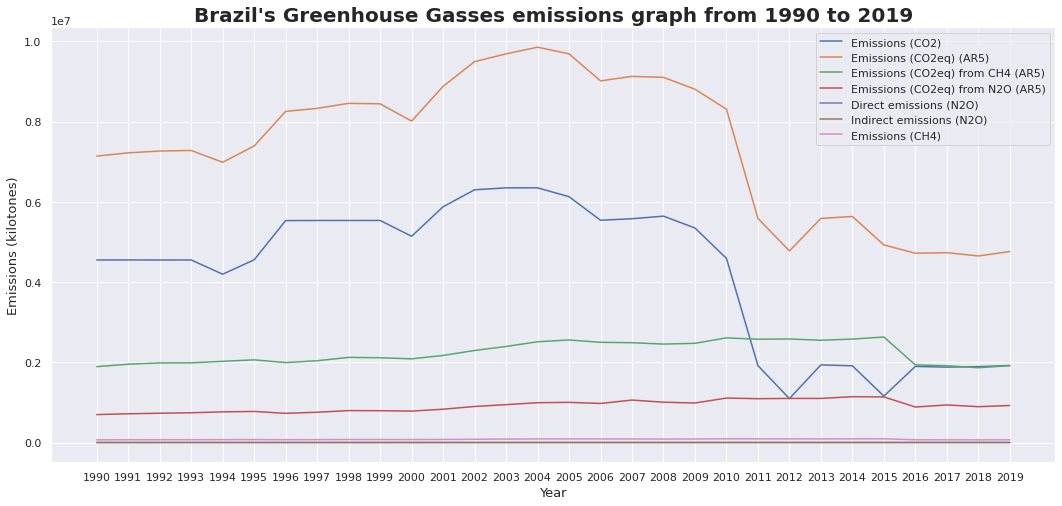

In [ ]:
# Visualization of carbon emissions from Brazil

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('year','Emissions (CO2)', data=df_carbon_brazil, label='Emissions (CO2)')
plt.plot('year','Emissions (CO2eq) (AR5)', data=df_carbon_brazil, label='Emissions (CO2eq) (AR5)')
plt.plot('year','Emissions (CO2eq) from CH4 (AR5)', data=df_carbon_brazil, label='Emissions (CO2eq) from CH4 (AR5)')
plt.plot('year','Emissions (CO2eq) from N2O (AR5)', data=df_carbon_brazil, label='Emissions (CO2eq) from N2O (AR5)')
plt.plot('year','Direct emissions (N2O)', data=df_carbon_brazil, label='Direct emissions (N2O)')
plt.plot('year','Indirect emissions (N2O)', data=df_carbon_brazil, label='Indirect emissions (N2O)')
plt.plot('year','Emissions (CH4)', data=df_carbon_brazil, label='Emissions (CH4)')
plt.title("Brazil's Greenhouse Gasses emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

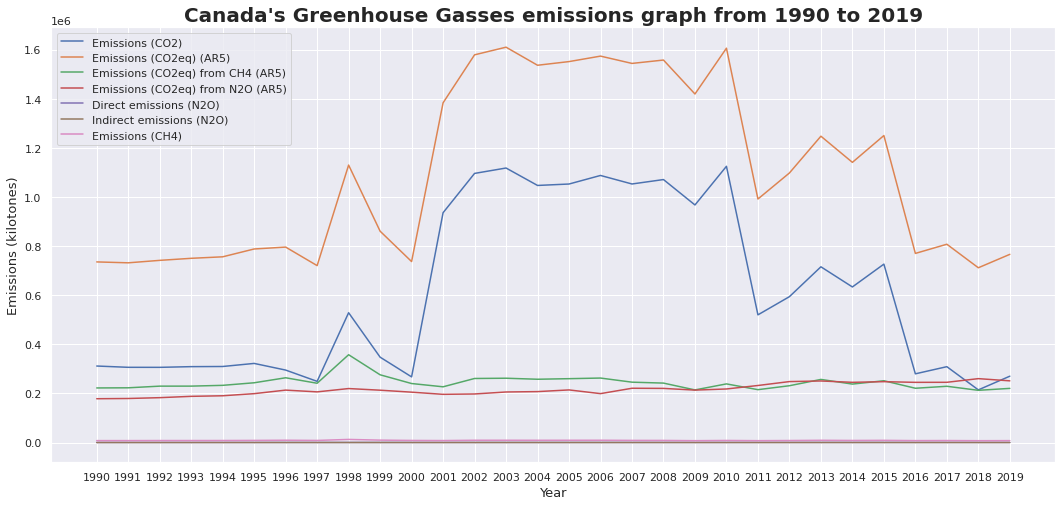

In [ ]:
# Visualization of carbon emissions from Canada

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('year','Emissions (CO2)', data=df_carbon_canada, label='Emissions (CO2)')
plt.plot('year','Emissions (CO2eq) (AR5)', data=df_carbon_canada, label='Emissions (CO2eq) (AR5)')
plt.plot('year','Emissions (CO2eq) from CH4 (AR5)', data=df_carbon_canada, label='Emissions (CO2eq) from CH4 (AR5)')
plt.plot('year','Emissions (CO2eq) from N2O (AR5)', data=df_carbon_canada, label='Emissions (CO2eq) from N2O (AR5)')
plt.plot('year','Direct emissions (N2O)', data=df_carbon_canada, label='Direct emissions (N2O)')
plt.plot('year','Indirect emissions (N2O)', data=df_carbon_canada, label='Indirect emissions (N2O)')
plt.plot('year','Emissions (CH4)', data=df_carbon_canada, label='Emissions (CH4)')
plt.title("Canada's Greenhouse Gasses emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

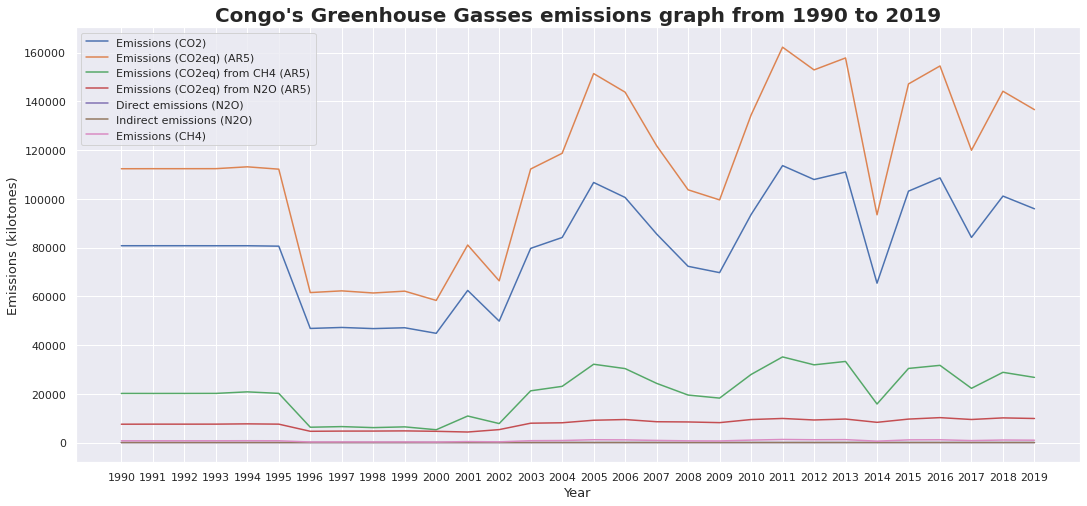

In [ ]:
# Visualization of carbon emissions from Congo

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('year','Emissions (CO2)', data=df_carbon_congo, label='Emissions (CO2)')
plt.plot('year','Emissions (CO2eq) (AR5)', data=df_carbon_congo, label='Emissions (CO2eq) (AR5)')
plt.plot('year','Emissions (CO2eq) from CH4 (AR5)', data=df_carbon_congo, label='Emissions (CO2eq) from CH4 (AR5)')
plt.plot('year','Emissions (CO2eq) from N2O (AR5)', data=df_carbon_congo, label='Emissions (CO2eq) from N2O (AR5)')
plt.plot('year','Direct emissions (N2O)', data=df_carbon_congo, label='Direct emissions (N2O)')
plt.plot('year','Indirect emissions (N2O)', data=df_carbon_congo, label='Indirect emissions (N2O)')
plt.plot('year','Emissions (CH4)', data=df_carbon_congo, label='Emissions (CH4)')
plt.title("Congo's Greenhouse Gasses emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

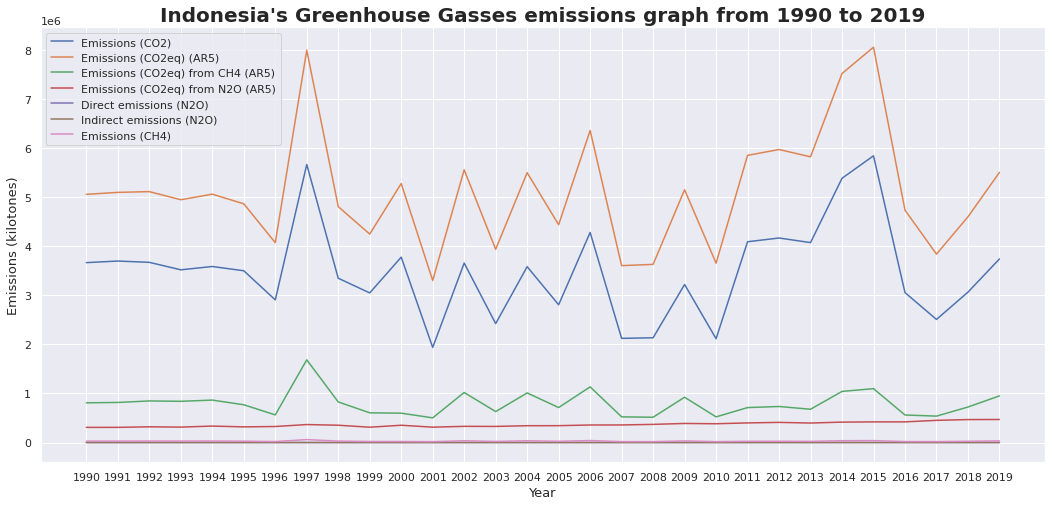

In [ ]:
# Visualization of carbon emissions from Indonesia

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('year','Emissions (CO2)', data=df_carbon_indonesia, label='Emissions (CO2)')
plt.plot('year','Emissions (CO2eq) (AR5)', data=df_carbon_indonesia, label='Emissions (CO2eq) (AR5)')
plt.plot('year','Emissions (CO2eq) from CH4 (AR5)', data=df_carbon_indonesia, label='Emissions (CO2eq) from CH4 (AR5)')
plt.plot('year','Emissions (CO2eq) from N2O (AR5)', data=df_carbon_indonesia, label='Emissions (CO2eq) from N2O (AR5)')
plt.plot('year','Direct emissions (N2O)', data=df_carbon_indonesia, label='Direct emissions (N2O)')
plt.plot('year','Indirect emissions (N2O)', data=df_carbon_indonesia, label='Indirect emissions (N2O)')
plt.plot('year','Emissions (CH4)', data=df_carbon_indonesia, label='Emissions (CH4)')
plt.title("Indonesia's Greenhouse Gasses emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

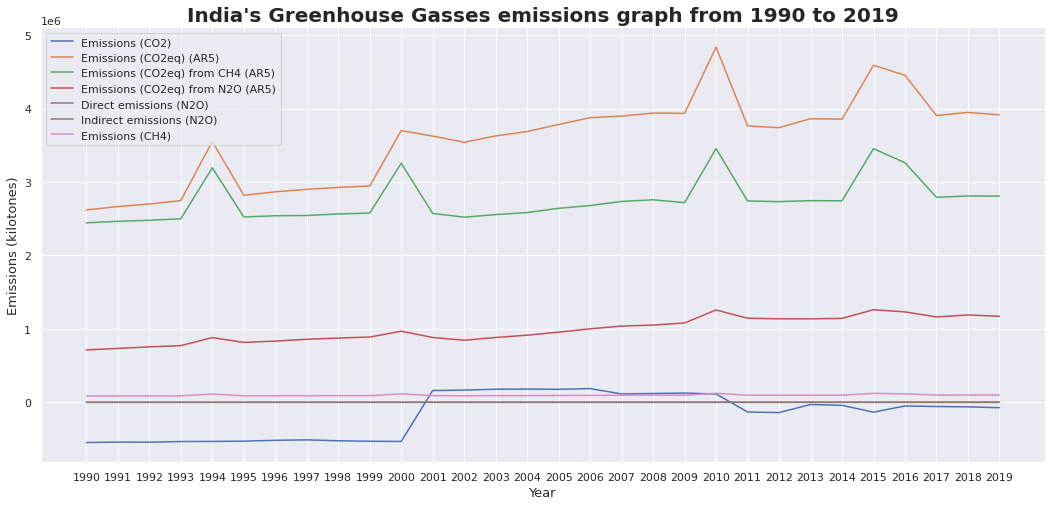

In [ ]:
# Visualization of carbon emissions from India

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('year','Emissions (CO2)', data=df_carbon_india, label='Emissions (CO2)')
plt.plot('year','Emissions (CO2eq) (AR5)', data=df_carbon_india, label='Emissions (CO2eq) (AR5)')
plt.plot('year','Emissions (CO2eq) from CH4 (AR5)', data=df_carbon_india, label='Emissions (CO2eq) from CH4 (AR5)')
plt.plot('year','Emissions (CO2eq) from N2O (AR5)', data=df_carbon_india, label='Emissions (CO2eq) from N2O (AR5)')
plt.plot('year','Direct emissions (N2O)', data=df_carbon_india, label='Direct emissions (N2O)')
plt.plot('year','Indirect emissions (N2O)', data=df_carbon_india, label='Indirect emissions (N2O)')
plt.plot('year','Emissions (CH4)', data=df_carbon_india, label='Emissions (CH4)')
plt.title("India's Greenhouse Gasses emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

In [ ]:
# Visualization of carbon emissions from across the country
# Concating into one data frame

Year = df_carbon_brazil['year'].to_list()
Brazil = df_carbon_brazil['Emissions (CO2eq) (AR5)'].to_list()
Canada = df_carbon_canada['Emissions (CO2eq) (AR5)'].to_list()
Congo = df_carbon_congo['Emissions (CO2eq) (AR5)'].to_list()
Indonesia = df_carbon_indonesia['Emissions (CO2eq) (AR5)'].to_list()
India = df_carbon_india['Emissions (CO2eq) (AR5)'].to_list()

datviz = {'Year':Year,
          'Brazil':Brazil,
          'Canada':Canada,
          'Congo':Congo,
          'Indonesia':Indonesia,
          'India':India
          }
df_datviz = pd.DataFrame(data=datviz)

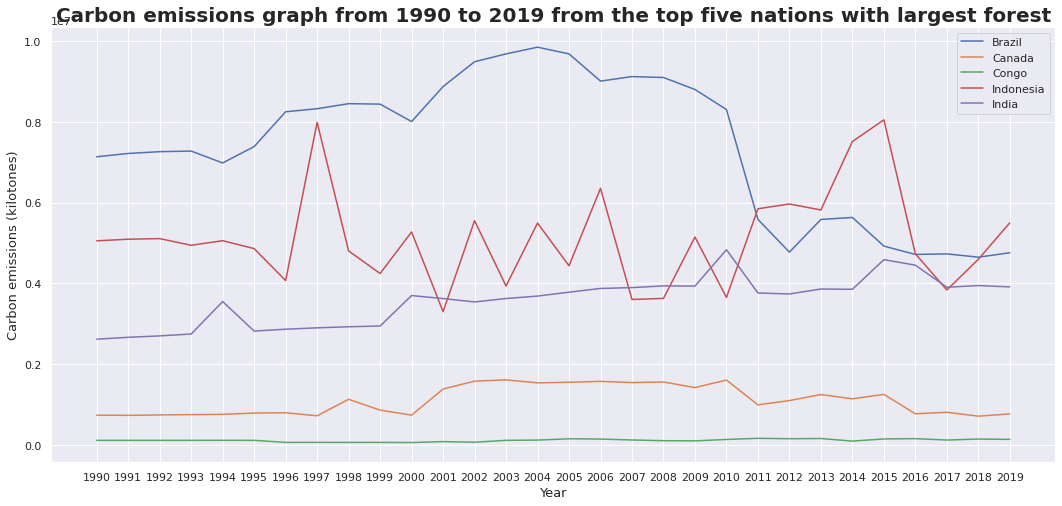

In [ ]:
# Visualization of carbon emissions according to IPCC Fifth Assessment Report (AR5) from each country

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot('Year', 'Brazil', data=df_datviz, label='Brazil')
plt.plot('Year','Canada', data=df_datviz, label='Canada')
plt.plot('Year','Congo', data=df_datviz, label='Congo')
plt.plot('Year','Indonesia', data=df_datviz, label='Indonesia')
plt.plot('Year','India', data=df_datviz, label='India')
plt.title("Carbon emissions graph from 1990 to 2019 from the top five nations with largest forest",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

**Carbon Emissions World Mapping**

In [ ]:
# Create a table with picked countries with their emission amount  
geo_df = df_datviz.copy()
geo_df["Year"] = geo_df["Year"].apply(lambda x: int(x))
geo_df.set_index("Year", inplace= True)
get_2019 = geo_df.loc[2019]
get_2019 = get_2019.reset_index().rename(columns = {"index":"Country", 2019:"Carbon"})
get_2019

# Get country code
def alpha3code(column):
    the_code=[]
    for country in column:
        code=pycountry.countries.get(name=country).alpha_3
        the_code.append(code)
    return the_code

# Create a column for code 
get_2019['Code']=alpha3code(get_2019['Country'])
get_2019

,Country,Carbon,Code
0,Brazil,4.759852e+06,BRA
1,Canada,7.664595e+05,CAN
2,Congo,1.366075e+05,COG
3,Indonesia,5.501914e+06,IDN
4,India,3.914089e+06,IND


In [ ]:
# Merge with latitude and longitude dataset
coordinates2 = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")
merged2 = get_2019.merge(coordinates2, how= "right", left_on= "Country", right_on= "country").reset_index(drop= True).sort_values("Carbon", ascending= True)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']
final = world.merge(merged2,left_on= "name", right_on = "country").sort_values("Carbon", ascending= False).reset_index(drop=True)
final

,pop_est,continent,name,Code_x,gdp_md_est,geometry,Country,Carbon,Code_y,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,5.501914e+06,IDN,ID,-0.789275,113.921327,Indonesia,NaN,NaN,NaN,NaN
1,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,4.759852e+06,BRA,BR,-14.235004,-51.925280,Brazil,ND,47.551493,-101.002012,North Dakota
2,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,3.914089e+06,IND,IN,20.593684,78.962880,India,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.664595e+05,CAN,CA,56.130366,-106.346771,Canada,OH,40.417287,-82.907123,Ohio
4,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ...",Congo,1.366075e+05,COG,CG,-0.228021,15.827659,Congo,PR,18.220833,-66.590149,Puerto Rico
5,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,FJ,-16.578193,179.414413,Fiji,NaN,NaN,NaN,NaN
6,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,TZ,-6.369028,34.888822,Tanzania,NaN,NaN,NaN,NaN
7,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",NaN,NaN,NaN,KZ,48.019573,66.923684,Kazakhstan,NaN,NaN,NaN,NaN
8,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN,NaN,UZ,41.377491,64.585262,Uzbekistan,NaN,NaN,NaN,NaN
9,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN,NaN,PG,-6.314993,143.955550,Papua New Guinea,NaN,NaN,NaN,NaN


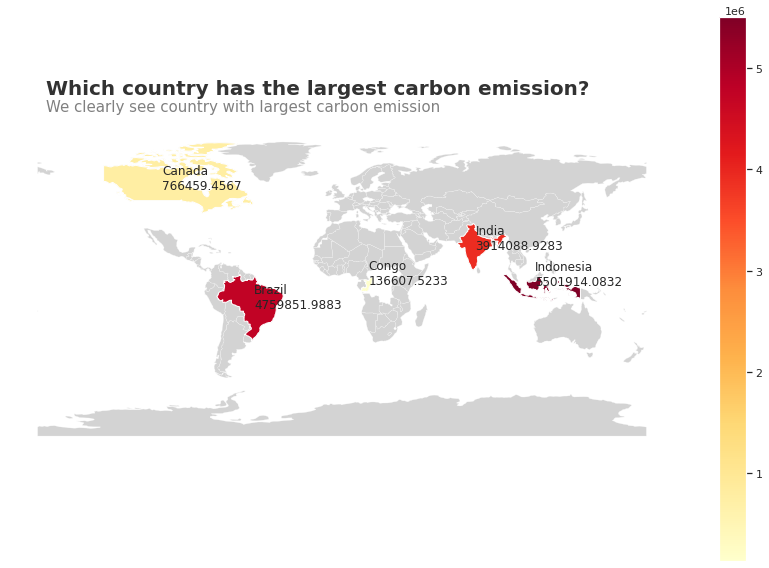

In [ ]:
# Create countries map
ax = final.plot(figsize=(15, 10), linewidth=0.25, edgecolor="#fafafa", color='lightgray')
ax.axis('off')
ax.set_facecolor("#fafafa")
final.plot(column='Carbon',figsize=(15, 10),legend=True,cmap="YlOrRd",ax=ax)


ax.text(-175,112,'Which country has the largest carbon emission?',fontsize=20,fontweight='bold',color='#323232')
ax.text(-175,102,'We clearly see country with largest carbon emission',color='gray',fontsize=15)

# Add countries names and numbers floating explaination 
for i in range(0,5):
    plt.text(float(final.longitude[i]),float(final.latitude[i]),"{}\n{}".format(final.Country[i],final.Carbon[i]),size=12)
plt.show()

**Causes for Carbon Emissions per Country Visualization**

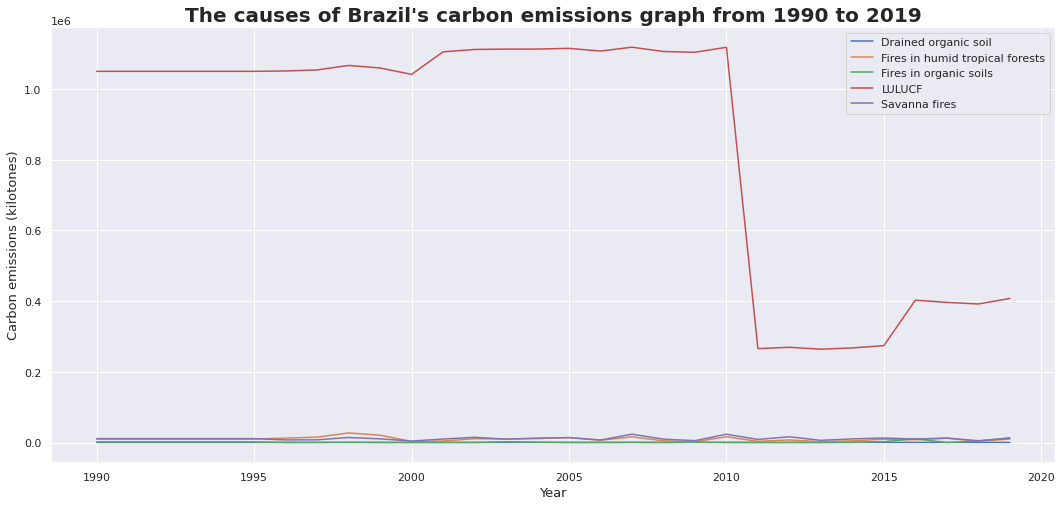

In [ ]:
# Visualization of the causes of carbon emissions from Brazil

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_brazil, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_brazil, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_brazil, label='Fires in organic soils')
plt.plot('year','LULUCF', data=transpose_brazil, label='LULUCF')
plt.plot('year','Savanna fires', data=transpose_brazil, label='Savanna fires')
plt.title("The causes of Brazil's carbon emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

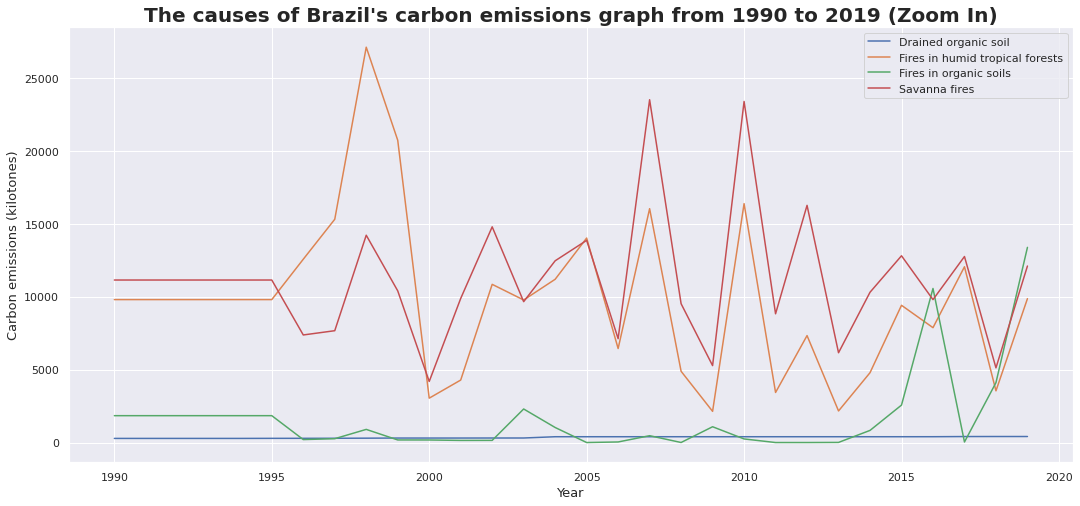

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_brazil, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_brazil, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_brazil, label='Fires in organic soils')
plt.plot('year','Savanna fires', data=transpose_brazil, label='Savanna fires')
plt.title("The causes of Brazil's carbon emissions graph from 1990 to 2019 (Zoom In)",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

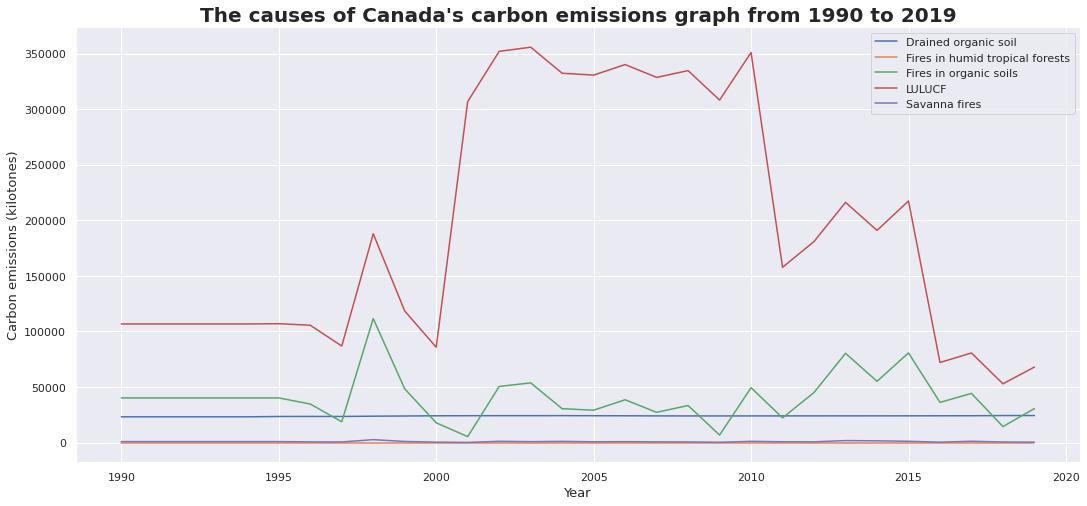

In [ ]:
# Visualization of the causes of carbon emissions from Canada

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_canada, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_canada, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_canada, label='Fires in organic soils')
plt.plot('year','LULUCF', data=transpose_canada, label='LULUCF')
plt.plot('year','Savanna fires', data=transpose_canada, label='Savanna fires')
plt.title("The causes of Canada's carbon emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

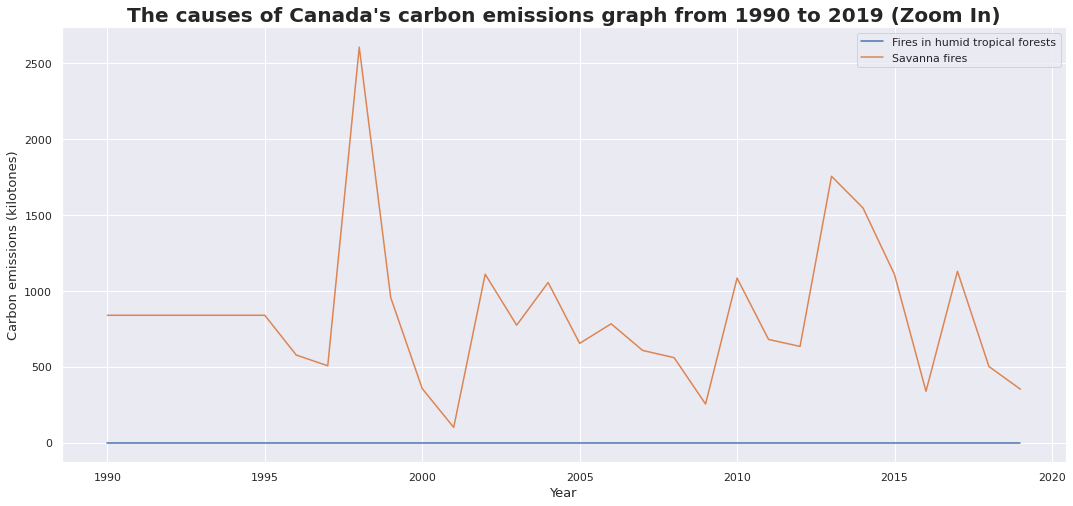

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Fires in humid tropical forests", data=transpose_canada, label='Fires in humid tropical forests')
plt.plot('year','Savanna fires', data=transpose_canada, label='Savanna fires')
plt.title("The causes of Canada's carbon emissions graph from 1990 to 2019 (Zoom In)",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

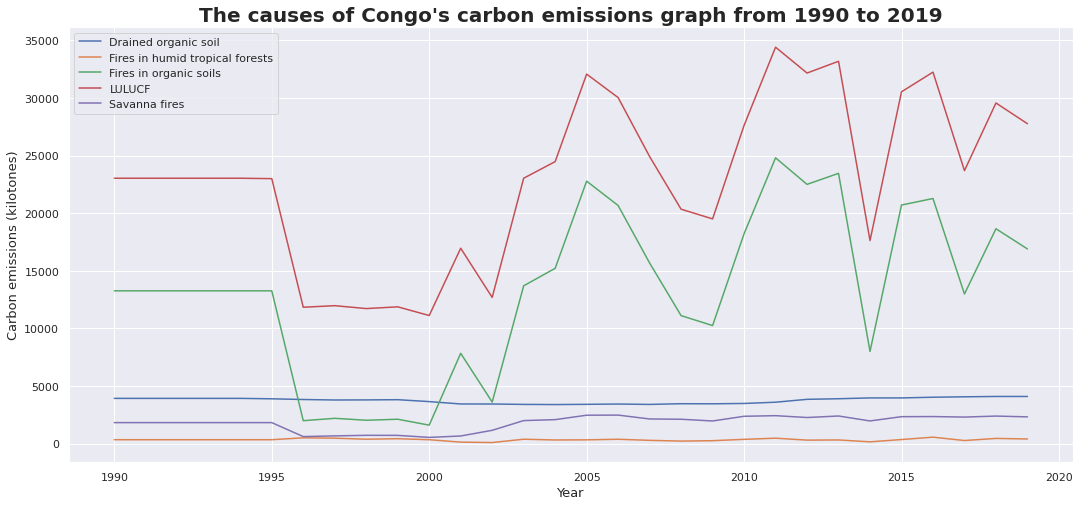

In [ ]:
# Visualization of the causes of carbon emissions from Congo

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_congo, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_congo, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_congo, label='Fires in organic soils')
plt.plot('year','LULUCF', data=transpose_congo, label='LULUCF')
plt.plot('year','Savanna fires', data=transpose_congo, label='Savanna fires')
plt.title("The causes of Congo's carbon emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

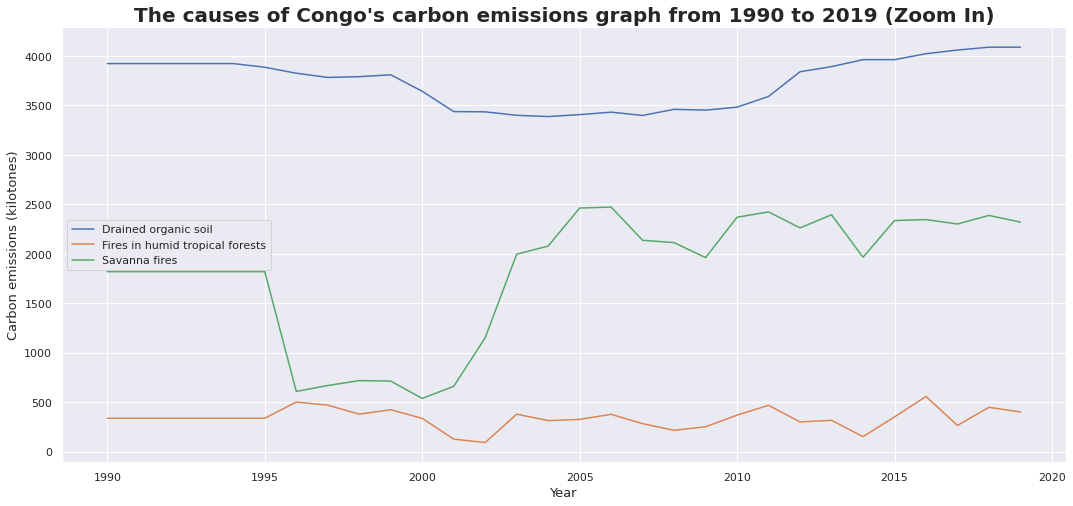

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_congo, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_congo, label='Fires in humid tropical forests')
plt.plot('year','Savanna fires', data=transpose_congo, label='Savanna fires')
plt.title("The causes of Congo's carbon emissions graph from 1990 to 2019 (Zoom In)",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend(loc='best')
plt.show()

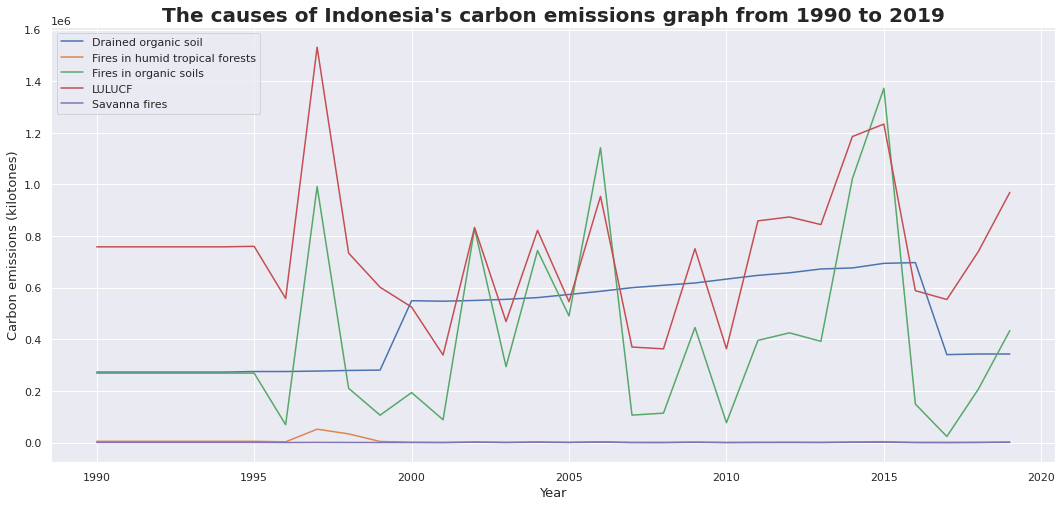

In [ ]:
# Visualization of the causes of carbon emissions from Indonesia

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_indo, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_indo, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_indo, label='Fires in organic soils')
plt.plot('year','LULUCF', data=transpose_indo, label='LULUCF')
plt.plot('year','Savanna fires', data=transpose_indo, label='Savanna fires')
plt.title("The causes of Indonesia's carbon emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

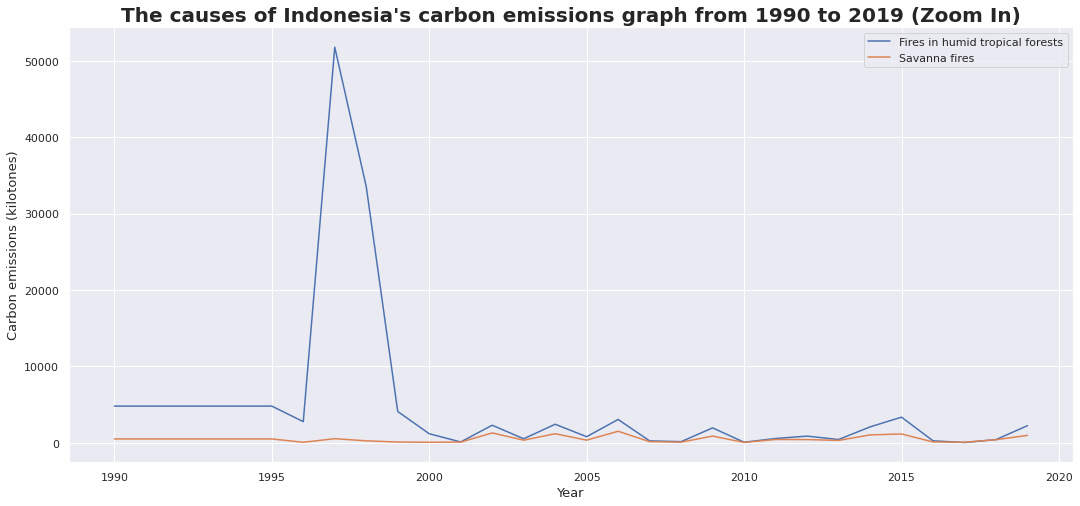

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Fires in humid tropical forests", data=transpose_indo, label='Fires in humid tropical forests')
plt.plot('year','Savanna fires', data=transpose_indo, label='Savanna fires')
plt.title("The causes of Indonesia's carbon emissions graph from 1990 to 2019 (Zoom In)",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

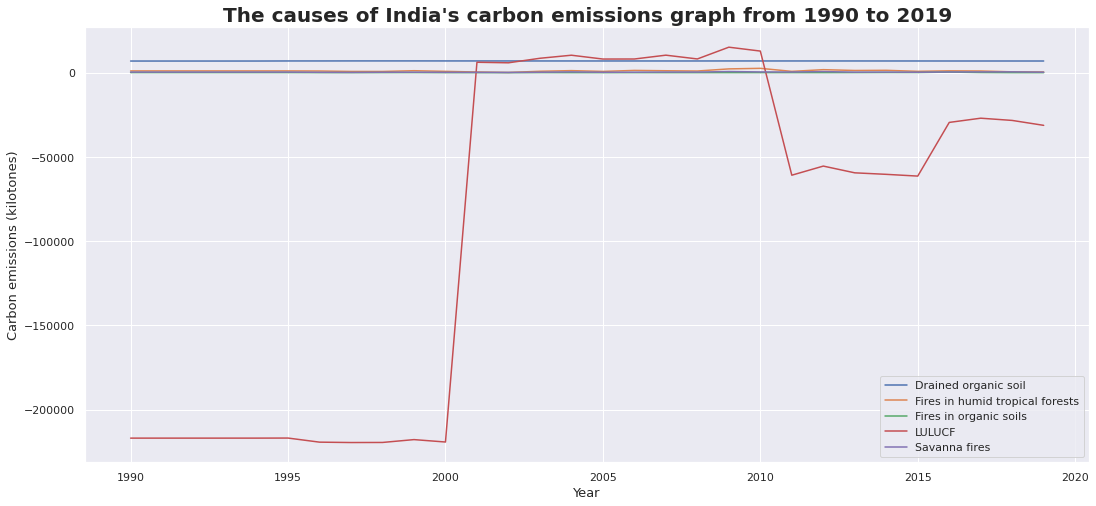

In [ ]:
# Visualization of the causes of carbon emissions from India

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Drained organic soils", data=transpose_india, label='Drained organic soil')
plt.plot("year", "Fires in humid tropical forests", data=transpose_india, label='Fires in humid tropical forests')
plt.plot("year", "Fires in organic soils", data=transpose_india, label='Fires in organic soils')
plt.plot('year','LULUCF', data=transpose_india, label='LULUCF')
plt.plot('year','Savanna fires', data=transpose_india, label='Savanna fires')
plt.title("The causes of India's carbon emissions graph from 1990 to 2019",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

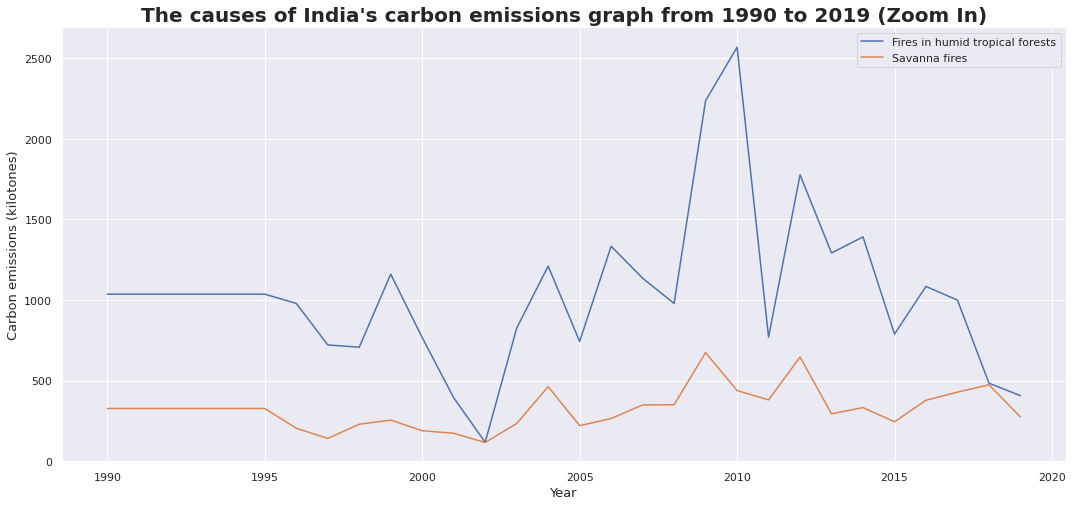

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,8)})
plt.plot("year", "Fires in humid tropical forests", data=transpose_india, label='Fires in humid tropical forests')
plt.plot('year','Savanna fires', data=transpose_india, label='Savanna fires')
plt.title("The causes of India's carbon emissions graph from 1990 to 2019 (Zoom In)",fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Carbon emissions (kilotones)',fontsize=13)
plt.legend()
plt.show()

# The End